# Lab | Imbalanced data

In [1]:
#Load the dataset and explore the variables.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [123]:
data=pd.read_csv('files_for_lab\customer_churn.csv')
display(data.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [124]:
data.shape

(7043, 21)

In [125]:
data['Churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

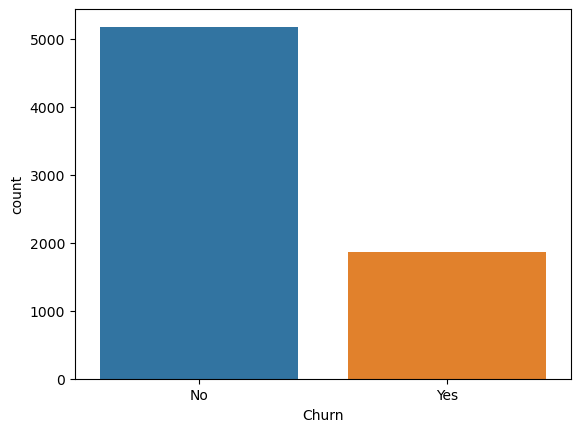

In [126]:
sns.countplot(x='Churn', data=data);
plt.show()

In [127]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
#We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [96]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [97]:
#Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [98]:
X = data[['tenure', 'SeniorCitizen', 'MonthlyCharges']]
y = data['Churn']

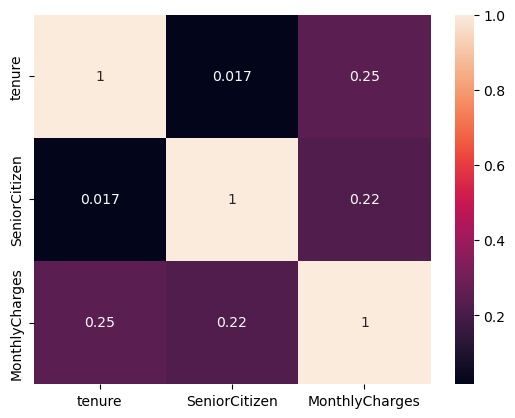

In [99]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [101]:
#Build the logistic regression model.

In [102]:
X.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [103]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [66]:
'''from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat) #drop="first"
print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
print(encoded)
#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())
onehot_encoded.head(20)'''

'from sklearn.preprocessing import OneHotEncoder\nencoder = OneHotEncoder().fit(X_cat) #drop="first"\nprint(encoder.categories_)\nencoded = encoder.transform(X_cat).toarray()\nprint(encoded)\n#onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)\nonehot_encoded = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())\nonehot_encoded.head(20)'

In [67]:
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
3296,-0.340191,-0.435476,-0.514314
6397,0.883210,2.296336,0.017840
6043,-1.196572,-0.435476,-0.819594
5309,1.168670,-0.435476,-1.483535
3000,-0.829552,-0.435476,0.658427


In [104]:
#from sklearn.preprocessing import MinMaxScaler

#transformer = MinMaxScaler()
#transformer.fit(X_train)

#X_train_scaled_np = transformer.transform(X_train)
#X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

# transform X_test using the same transformer
#X_test_scaled_np = transformer.transform(X_test)
#X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

#X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
3296,0.333333,0.0,0.309263
6397,0.750000,1.0,0.468127
6043,0.041667,0.0,0.218127
5309,0.847222,0.0,0.019920
3000,0.166667,0.0,0.659363


In [105]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: Churn, dtype: object

In [106]:
#Build the logistic regression model.

In [107]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [108]:
lr.predict_proba(X_train_scaled)

array([[0.82725498, 0.17274502],
       [0.88500479, 0.11499521],
       [0.66483754, 0.33516246],
       ...,
       [0.98672745, 0.01327255],
       [0.2648887 , 0.7351113 ],
       [0.79236077, 0.20763923]])

In [109]:
lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1]

1.0

In [110]:
lr.predict_proba(X_train_scaled).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [111]:
lr.predict(X_train_scaled)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [112]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

In [113]:
logits

array([-1.56629635, -2.04070257, -0.68492732, ..., -4.30869562,
        1.02071218, -1.33921473])

In [114]:
X_train_scaled.columns

Index(['tenure', 'SeniorCitizen', 'MonthlyCharges'], dtype='object')

In [115]:
y_train

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
       ... 
4931     No
3264     No
1653     No
2607    Yes
2732     No
Name: Churn, Length: 5282, dtype: object

In [116]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

Accuracy: 0.488358886996025


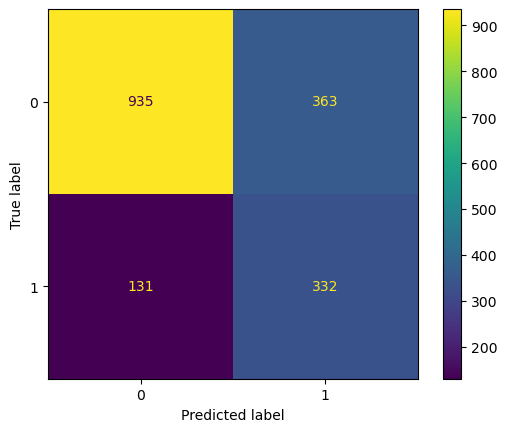

In [130]:
y_pred = logreg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()
plt.show()

#cm = confusion_matrix(y_test, y_pred)
#sns.heatmap(cm, annot=True, cmap='Blues')
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
#plt.show()

In [120]:
sm = SMOTE(random_state=100,k_neighbors=3)
#creates fake samples, based on original data
#Use over or under sample, depending on class weight.
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [119]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)
print('Accuracy (SMOTE):', accuracy_score(y_test, y_pred_test))

Accuracy (SMOTE): 0.7836456558773425


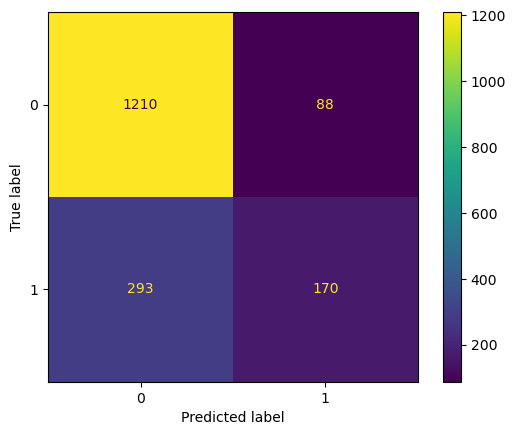

In [132]:
cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()


#sns.heatmap(cm, annot=True, cmap='Blues')
#plt.xlabel('Predicted labels')
#plt.ylabel('True labels')
#plt.show()